# WEEK 4

# K-Means cluster analysis

## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

## Importing dataset

In [2]:
data = pd.read_csv("gapminder.csv")

data1 = data.iloc[:,[0,1,2,9,14]].copy()

data1.head()

data1.columns = ["country","income","alcohol","life","employment"]

## Data Management 

In [3]:
data1  = data1.iloc[:,1:]

def fun1(a):
    
    for i in range(len(a)):
        if a[i]==" ":
            a[i] = np.nan
        else :
            a[i] = float(a[i])
            
            
    x = np.mean(a.dropna())
    
    for i in range(len(a)):
        if np.isnan(a[i]):
            a[i] = x
            

for i in data1.columns :
    fun1(data1[i])

data1.head()

## Removing Outliers 

data2 = data1.copy()

def fun2(a):
    mean = np.mean(a)
    std = np.std(a)
    
    mx = mean+3*std
    mn = mean-3*std
    
    for i in range(len(a)):
        
        if (a[i]>mx)|(a[i]<mn):
            a[i]=np.nan
            
    
    

for i in data2.columns:
    fun2(data2[i])

l1 =  len(data2)

data2 = data2.dropna()

l1 - len(data2) 

5

5 Outliers removed 

In [4]:
data2.head()

,income,alcohol,life,employment
0,8740.97,0.03,48.673,55.7
1,1915,7.29,76.918,51.4
2,2231.99,0.69,73.131,50.5
3,21943.3,10.17,69.7535,58.636
4,1381,5.57,51.093,75.7


## Preprocessing

In [5]:
data2["income"] = preprocessing.scale(data2["income"].astype("float64"))
data2["life"] = preprocessing.scale(data2["life"].astype("float64"))
data2["employment"] = preprocessing.scale(data2["employment"].astype("float64"))
data2["alcohol"] = preprocessing.scale(data2["alcohol"].astype("float64"))

In [6]:
data2.head()

,income,alcohol,life,employment
0,0.131357,-1.465189,-2.273449,-0.314079
1,-0.589645,0.158481,0.779464,-0.759866
2,-0.556162,-1.317583,0.370139,-0.853170
3,1.525876,0.802581,0.005078,-0.009705
4,-0.646049,-0.226190,-2.011878,1.759346


In [8]:
x_train,x_test = train_test_split(data2 , random_state = 50)

In [12]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(x_train)
    clusassign=model.predict(x_test)
    meandist.append(sum(np.min(cdist(x_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / x_train.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

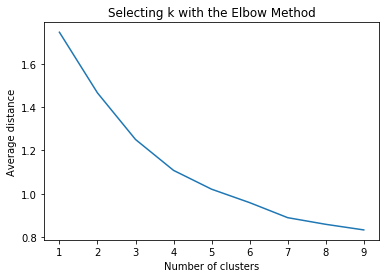

In [13]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

K ==3 IS CORRECT